# Analisando Dados de Arquivos CSV e XLSX com Python

Neste projeto trabalharei com arquivos csv e excel e analisarei as informações contidas nestes.

In [88]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

### 1. Carregando e Analisando Dados de Arquivo CSV:

In [4]:
# Carregando Dados

df = pd.read_csv("dados/Gapminder.csv", sep = ';' )

In [5]:
# Carregando os 10 primeiras linhas

df.head(10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


In [7]:
#Verificando o tamanho do dataset (nº de linhas e colunas)

df.shape

(3312, 6)

In [12]:
# Alterando os nomes das colunas

df.rename(columns = {
    "country": "Pais",
    "continent": "Continente",
    "year": "Ano",
    "lifeExp": "Expectativa_De_Vida",
    "pop": "Populacao_Total",
    "gdpPercap": "PIB"
}, inplace = True)

df.head()

,Pais,Continente,Ano,Expectativa_De_Vida,Populacao_Total,PIB
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [17]:
#Verificando tipo de dados:

df.dtypes

Pais                    object
Continente              object
Ano                      int64
Expectativa_De_Vida    float64
Populacao_Total          int64
PIB                    float64
dtype: object

### 1.1 Resumo Estatístico dos Dados

In [16]:
df.describe()

,Ano,Expectativa_De_Vida,Populacao_Total,PIB
count,3312.000000,3312.000000,3.312000e+03,3312.000000
mean,1980.301630,65.246871,3.161489e+07,11317.115805
std,16.927294,11.768412,1.041193e+08,11369.142739
min,1950.000000,23.599000,5.941200e+04,241.165876
25%,1967.000000,58.337500,2.678572e+06,2514.625266
50%,1982.000000,69.610000,7.557218e+06,7838.505123
75%,1996.000000,73.657750,1.958522e+07,17357.879170
max,2007.000000,82.670000,1.318683e+09,113523.132900


### 1.2 Análise Exploratória dos Dados

In [19]:
# Verificando quantos países foram analisados por continente

df.groupby("Continente")["Pais"].nunique()

Continente
Africa      51
Americas    25
Asia        41
Europe      35
FSU          6
Oceania      3
Name: Pais, dtype: int64

Text(0.5, 0, 'Nº de Países')

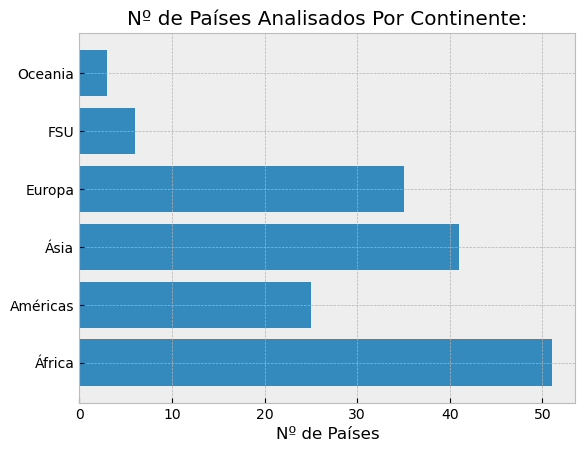

In [89]:
labels = ('África', 'Américas', 'Ásia', 'Europa', 'FSU', 'Oceania')
y_pos = [51, 25, 41, 35, 6, 3]
grafico = plt.subplot()
plt.barh(labels, y_pos)

grafico.set_title("Nº de Países Analisados Por Continente:")
grafico.set_xlabel("Nº de Países")


In [108]:
#Expectativa de vida média por ano

#Inserindo em um dataframe os dados

exp_vida =pd.DataFrame(df.groupby("Ano")["Expectativa_De_Vida"].mean()).reset_index()


In [109]:
exp_vida

,Ano,Expectativa_De_Vida
0,1950,62.002568
1,1951,65.904167
2,1952,49.206867
3,1953,66.674563
4,1954,67.459817
5,1955,67.806757
6,1956,67.950637
7,1957,51.614590
8,1958,68.815936
9,1959,68.226579


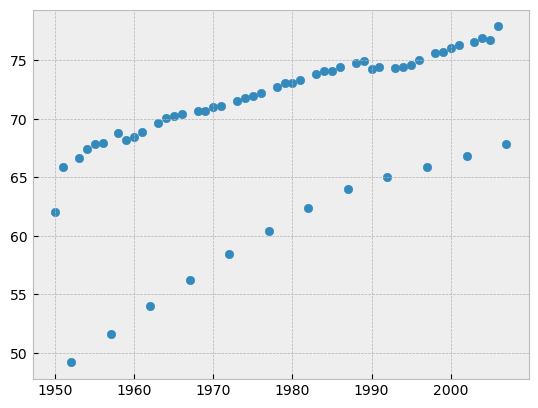

In [110]:
plt.scatter(x = exp_vida.Ano, y = exp_vida.Expectativa_De_Vida)

Observando o gráfico vemos que houve um crescimento ao longos dos anos da expectativa de vida média.

In [127]:
# Os 10 Países com Maior Expectativa de Vida Média

exp_vida1 = pd.DataFrame(df.groupby(df.Pais)["Expectativa_De_Vida"].mean()).reset_index()
top_10 = exp_vida1.sort_values("Expectativa_De_Vida", ascending = False).head(10)
top_10


,Pais,Expectativa_De_Vida
106,Martinique,78.783000
67,Guadeloupe,78.405000
76,Iceland,76.228397
43,Cyprus,76.126750
159,Sweden,76.023862
126,Norway,75.685276
119,Netherlands,75.459690
63,Germany,75.358691
99,"Macao, China",75.341125
160,Switzerland,75.315534


In [129]:
# Os 10 Países com as Menores Expectativa de Vida Média
top_10_Piores = exp_vida1.sort_values("Expectativa_De_Vida").head(10)
top_10_Piores

,Pais,Expectativa_De_Vida
147,Sierra Leone,36.769167
0,Afghanistan,37.478833
3,Angola,37.883500
70,Guinea-Bissau,39.210250
115,Mozambique,40.379500
152,Somalia,40.988667
141,Rwanda,41.481583
95,Liberia,42.476250
51,Equatorial Guinea,42.960000
69,Guinea,43.239833


### 2. Carregando e Analisando Dados de Arquivos Excel (XLSX) em Python

### 2.1 Lendo vários arquivos excel de uma vez só e gerando um Dataframe com todas as planilhas:

In [138]:

list_df = []


for i in range(1,6):
    file = "dados/planilha"+str(i)+".xlsx"
    list_df.append(pd.read_excel(file))
                   
df1 = pd.concat(list_df)
       

In [139]:
df1

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3
138,Fortaleza,2019-03-02,150.38,983,6
139,Fortaleza,2019-03-02,141.16,980,7
140,Fortaleza,2019-03-02,166.89,983,5


In [137]:
# Número de Lojas Por Cidade

df1.groupby("Cidade")["LojaID"].nunique()

Cidade
Aracaju      4
Fortaleza    8
Natal        7
Recife       4
Salvador     4
Name: LojaID, dtype: int64

In [142]:
# Inserindo a coluna Receita

df1["Receita"] = df1.Vendas*df1.Qtde 
df1

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
137,Fortaleza,2019-03-02,51.99,983,3,155.97
138,Fortaleza,2019-03-02,150.38,983,6,902.28
139,Fortaleza,2019-03-02,141.16,980,7,988.12
140,Fortaleza,2019-03-02,166.89,983,5,834.45


In [155]:
# Caculando a Receita por Cidade

Receita_Por_Cidade = pd.DataFrame(df1.groupby("Cidade")["Receita"].sum())
Receita_Por_Cidade

,Receita
Cidade,
Aracaju,48748.25
Fortaleza,37913.97
Natal,167227.52
Recife,51936.51
Salvador,40596.73


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Aracaju'),
  Text(1, 0, 'Fortaleza'),
  Text(2, 0, 'Natal'),
  Text(3, 0, 'Recife'),
  Text(4, 0, 'Salvador')])

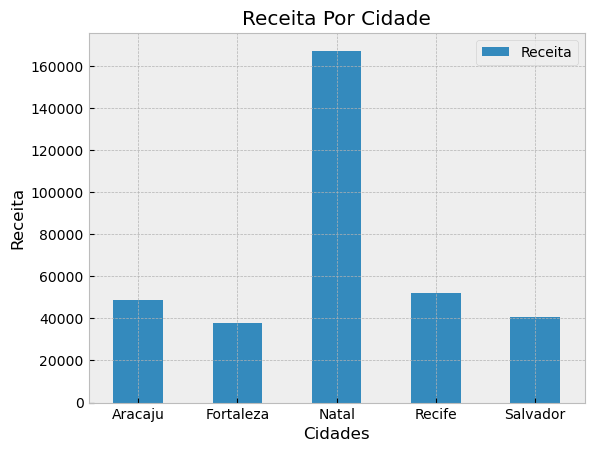

In [168]:
Receita_Por_Cidade.plot.bar(title = "Receita Por Cidade")
plt.xlabel("Cidades")
plt.ylabel("Receita")
plt.xticks(rotation = 'horizontal')

In [163]:
# Receita por loja

Receita_por_loja = pd.DataFrame(df1.groupby("LojaID")["Receita"].sum())
Receita_por_loja

,Receita
LojaID,
852,52744.00
853,42469.00
854,46655.00
980,13598.62
981,11748.87
982,15819.33
983,23415.17
1002,7983.09
1003,6731.86


Text(0, 0.5, 'Receita')

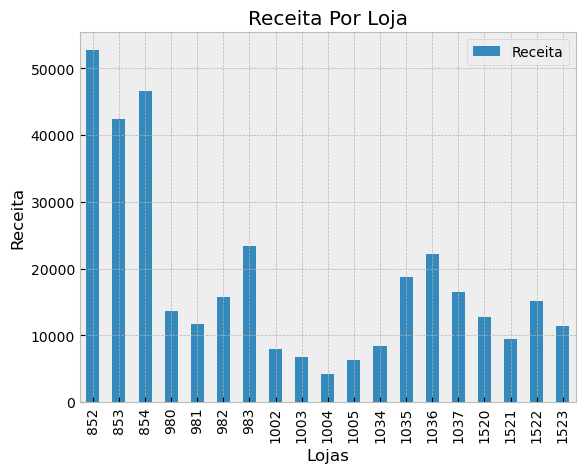

In [167]:
Receita_por_loja.plot.bar(title = "Receita Por Loja")
plt.xlabel("Lojas")
plt.ylabel("Receita")